In [1]:
import numpy as np
import pandas as pd
import json

dic = {}

In [2]:
category = pd.read_csv('category_key_inventory.csv',header=None)

In [3]:
# change all to lower cases
for col in list(category):
    category[col] = category[col].str.lower()

In [4]:
for c in category[0]:
    temp = category[category[0]==c]
    dic[c] = temp.values.tolist()[0][1:]

In [5]:
dic.keys()

dict_keys(['sports', 'food', 'travel', 'occupation', 'tv show', 'movie', 'video games', 'clothing brand', 'celebrities', 'company'])

In [6]:
with open('data1.json') as f:
    data1 = json.load(f)
    
with open('data2.json') as f:
    data2 = json.load(f)

# df = pd.io.json.json_normalize(jsonstr)

In [10]:
# data1

In [11]:
# data2

# word cloud

In [12]:
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [13]:
def wordcloud(text,ngram=1):
    wordcloud = WordCloud(width=1400, 
                          height=800,
                          background_color='black')
    if ngram ==1:
        wordc = wordcloud.generate(' '.join(text))
    else:
        wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

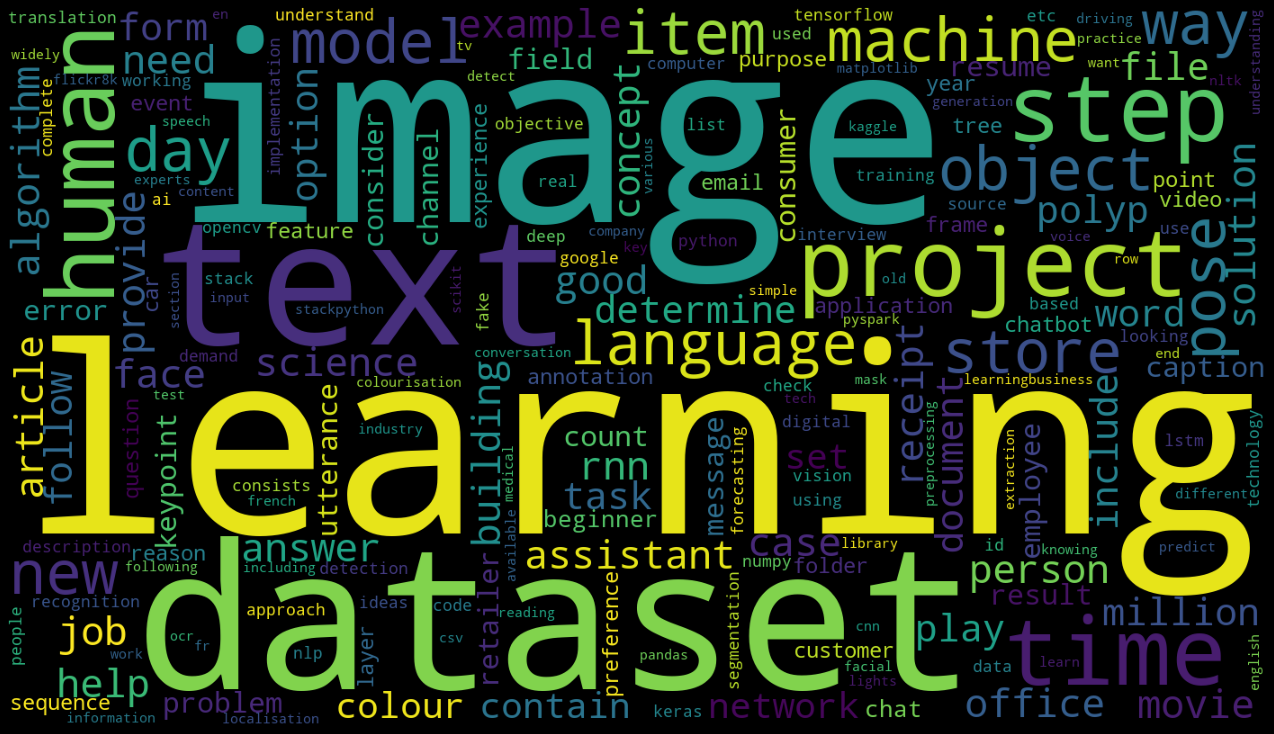

In [14]:
wordcloud(data1)

# category match

In [15]:
def find_top_match(default_category, user_input, threshold=1):
    top = dict((k, v) for k, v in user_input.items() if v > threshold)
    for w in top:
        for category, category_items in default_category.items():  
            if w in category_items:
                print('Most Frequent Word: ', w)
                print('Category: ', category)
                break

In [16]:
find_top_match(dic, data1)

Most Frequent Word:  salesforce
Category:  company


In [17]:
find_top_match(dic, data2)

Most Frequent Word:  disney
Category:  company


# sentiment

In [30]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

all_text = listToString(list(data1.keys()))

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [32]:
def create_sentiment_scores(data):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(data)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("input is rated as ", sentiment_dict['neg']*100, "% Negative")
    print("input is rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("input is rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Overall Rating:", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [34]:
create_sentiment_scores(all_text)

Overall sentiment dictionary is :  {'neg': 0.041, 'neu': 0.84, 'pos': 0.119, 'compound': 0.9973}
input is rated as  4.1000000000000005 % Negative
input is rated as  84.0 % Neutral
input is rated as  11.899999999999999 % Positive
Overall Rating: Positive


# Top 5 Matches - similarity between words

In [13]:
pip install gensim

You should consider upgrading via the '/Users/xiangxinqian/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath
#from sklearn.metrics.pairwise import cosine_similarity

print('Imported Successfully!')

'Imported Successfully!'


In [15]:
# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText()

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

print(model)

In [16]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText(vector_size=100)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

print(model)

In [17]:
# Save a model trained via Gensim's fastText implementation to temp.
import tempfile
import os
with tempfile.NamedTemporaryFile(prefix='saved_model_gensim-', delete=False) as tmp:
    model.save(tmp.name, separately=[])

# Load back the same model.
loaded_model = FastText.load(tmp.name)
print(loaded_model)

os.unlink(tmp.name)  # demonstration complete, don't need the temp file anymore

In [18]:
wv = model.wv
print(wv)

In [23]:
from collections import defaultdict
import operator
new_dict = {}


def find_top5_matches(default_category, user_input, threshold=1):
    top = dict((k, v) for k, v in user_input.items() if v > threshold)
    
    for key, value in top.items():
        #print(key)
        #print(value)

        for category, category_items in default_category.items(): 
            
            score = np.zeros(len(category_items))
            rows = []
            
            for i in range(len(category_items)):
                #print(category_items[i])
                
                sim = wv.similarity(key, category_items[i])
                #print(sim)
                #print(value)
                score[i] = (sim**value)
                #print(score[i])
                rows.append([key, score[i],category_items[i]])
                #print(rows)
                
            new_dict[key] = max(score[:])
            #print(new_dict)
        
    new_sort = dict(sorted(new_dict.items(), key=operator.itemgetter(1), reverse=True)[:5])
    
    print(new_sort)
    print(new_sort.keys())
    #sorted(new_dict.items())

In [24]:
find_top5_matches(dic, data1)

{'cooking': 0.9999814034372889,
 'disney': 1.0,
 'running': 0.9999730588820199,
 'spending': 0.9999787808590241,
 'using': 0.9999780656110033}
dict_keys(['disney', 'cooking', 'spending', 'using', 'running'])
